In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

1. Clustering with the Iris Dataset
    - Using this lesson as a guide, perform clustering on the iris dataset.
    - Choose features other than the ones used in the lesson.
    - Visualize the results of your clustering.
    - Use the elbow method to visually select a good value for k.
    - Repeat the clustering, this time with 3 different features.

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

3. How does scaling impact the results of clustering?
    - Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

In [2]:
df = sns.load_dataset("iris")

# Feature Engineering
df["sepal_area"] = df.sepal_length * df.sepal_width
df["petal_area"] = df.petal_length * df.petal_width

In [3]:
train_validate, test = train_test_split(df, train_size=.80, random_state=123)
train, validate = train_test_split(train_validate, random_state=123)

train.shape, validate.shape, test.shape

((90, 7), (30, 7), (30, 7))

In [4]:
# Scale the datasets
scaler = StandardScaler()
cols = train.drop(columns=["species"]).columns.tolist()

train_scaled = train.copy()
validate_scaled = validate.copy()
test_scaled = test.copy()

train_scaled[cols] = scaler.fit_transform(train[cols])
validate_scaled[cols] = scaler.transform(validate[cols])
test_scaled[cols] = scaler.transform(test[cols])

In [5]:
# Fit K-Means
X = train_scaled[["sepal_area", "petal_area"]]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

train_scaled['cluster'] = kmeans.labels_

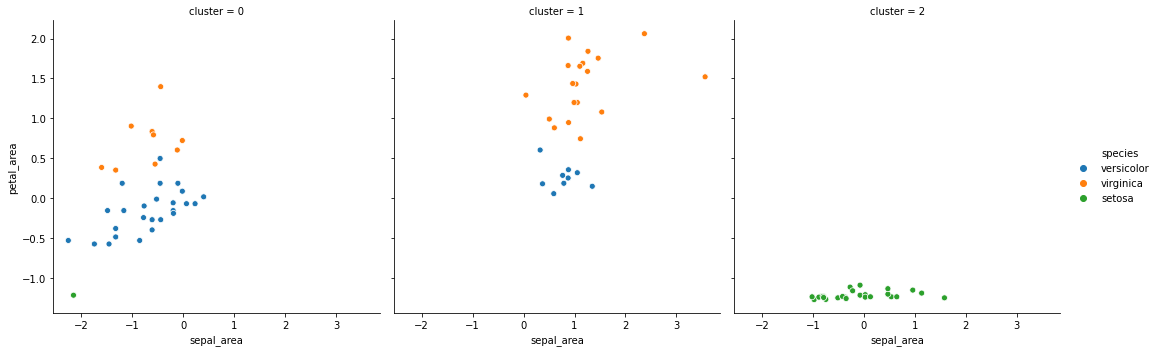

In [6]:
# visualize w/ hue="species" style="cluster"
sns.relplot(x="sepal_area", y="petal_area", hue="species", col="cluster", data=train_scaled)

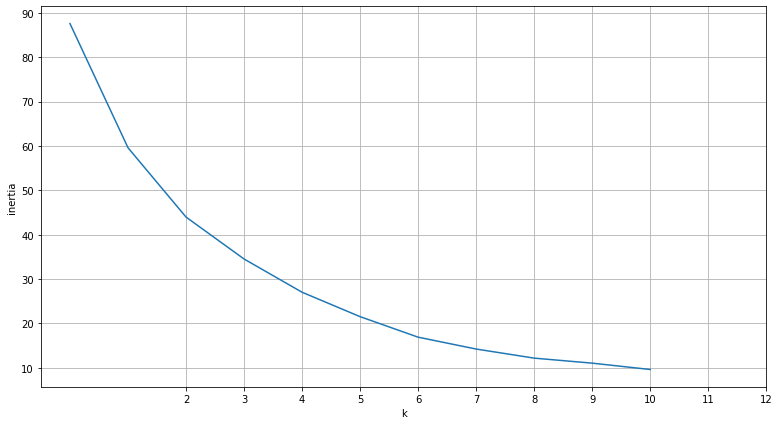

In [7]:
def get_inertia(k):
    return KMeans(k).fit(X).inertia_

plt.figure(figsize=(13, 7))
df = pd.Series([get_inertia(k) for k in range(2, 13)]).plot()

plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

In [8]:
train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,cluster
86,1.039148,0.164244,0.510148,0.373142,versicolor,0.874447,0.255092,1
82,-0.075700,-0.789432,0.038638,-0.038076,versicolor,-0.610737,-0.266638,0
109,1.658507,1.356340,1.335292,1.743869,virginica,2.371258,2.060234,1
147,0.791404,-0.074175,0.804843,1.058506,virginica,0.505331,0.992559,1
49,-1.066675,0.641083,-1.434833,-1.408803,setosa,-0.366597,-1.235250,2


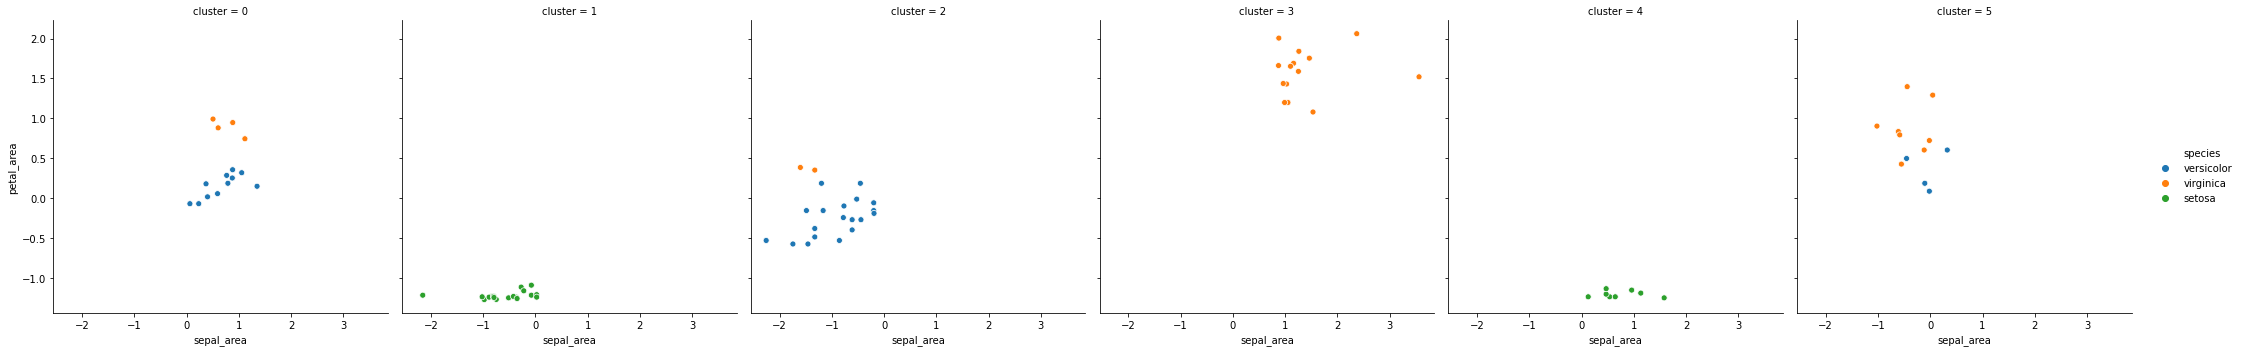

In [9]:
# Fit K-Means
X = train_scaled[["sepal_area", "petal_area", "sepal_length", "petal_width"]]
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

train_scaled['cluster'] = kmeans.labels_

# visualize w/ hue="species" style="cluster"
sns.relplot(x="sepal_area", y="petal_area", hue="species", col="cluster", data=train_scaled)

## Clustering Mall Data

In [10]:
import env

db_name = "mall_customers"
query = 'SELECT * FROM customers'

url = env.get_url(db_name)
df = pd.read_sql(query, url, index_col="customer_id")

# Encode gener
df.gender = df.gender.apply(lambda x: 1 if x == "Female" else 0)

# Split nice and early
train_validate, test = train_test_split(df, train_size=.80, random_state=123)
train, validate = train_test_split(train_validate, random_state=123)

train.shape, validate.shape, test.shape

train.head()

,gender,age,annual_income,spending_score
customer_id,,,,
64,1,54,47,59
49,1,29,40,42
25,1,54,28,14
137,1,44,73,7
177,0,58,88,15


In [18]:
# Scale the datasets

# Start w/ empty copies to retain the original splits
train_scaled = train.copy()
validate_scaled = validate.copy()
test_scaled = test.copy()

# Scale the datasets
scaler = StandardScaler()
cols = train.drop(columns=["gender"]).columns.tolist()

train_scaled[cols] = scaler.fit_transform(train[cols])
validate_scaled[cols] = scaler.transform(validate[cols])
test_scaled[cols] = scaler.transform(test[cols])

# Add back in the 
train_scaled["gender"] = train.gender.copy()
validate_scaled["gender"] = validate.gender.copy()
test_scaled["gender"] = test.gender.copy()

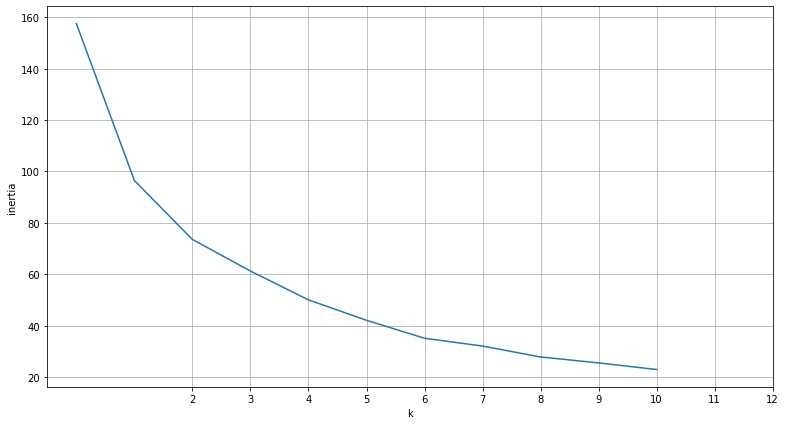

In [19]:
def get_inertia(k):
    return KMeans(k).fit(X).inertia_

plt.figure(figsize=(13, 7))
df = pd.Series([get_inertia(k) for k in range(2, 13)]).plot()

plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

In [20]:
# Looks like the sweet spot is 4, 5, or 6
# Let's start with and visualize kmeans clusters w/ k=4

# Fit K-Means
X = train_scaled.copy()
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

train_scaled['cluster'] = kmeans.labels_

train_scaled.head()

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
64,1,1.035957,-0.509762,0.339011,2
49,1,-0.679204,-0.780775,-0.365248,3
25,1,1.035957,-1.245369,-1.525205,2
137,1,0.349893,0.496857,-1.815194,0
177,0,1.310383,1.077599,-1.483778,0


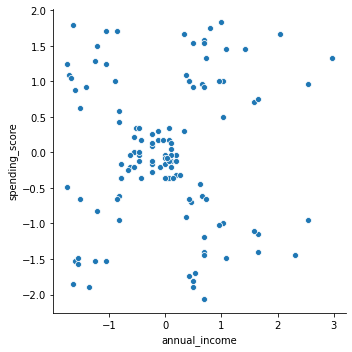

In [28]:
sns.relplot(x="annual_income", y="spending_score", data=train_scaled)

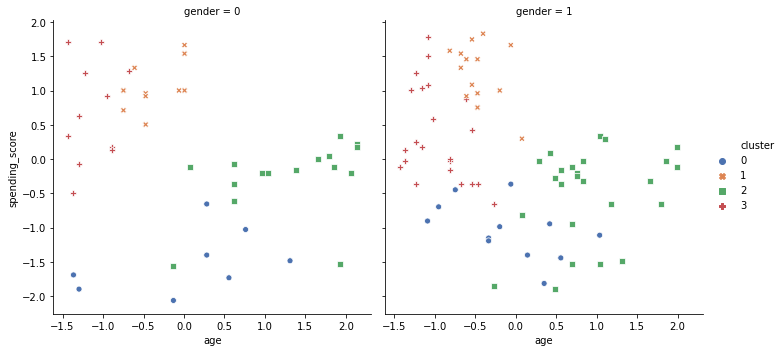

In [53]:
# One column per gender value
# One color/shape for each cluster label
sns.relplot(x="age", y="spending_score", hue="cluster", col="gender", style="cluster", palette="deep", data=train_scaled)

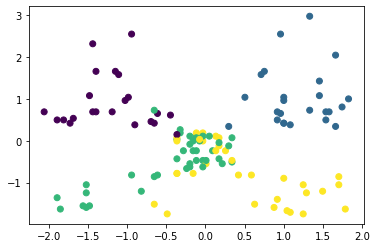

In [52]:
plt.scatter(train_scaled.spending_score, train_scaled.annual_income, c=train_scaled.cluster)

In [54]:
# Looks like the sweet spot is 4, 5, or 6
# Let's start with and visualize kmeans clusters w/ k=4

# Fit K-Means
X = train_scaled.copy()
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

train_scaled['cluster'] = kmeans.labels_

train_scaled.head()

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
64,1,1.035957,-0.509762,0.339011,0
49,1,-0.679204,-0.780775,-0.365248,2
25,1,1.035957,-1.245369,-1.525205,4
137,1,0.349893,0.496857,-1.815194,3
177,0,1.310383,1.077599,-1.483778,3


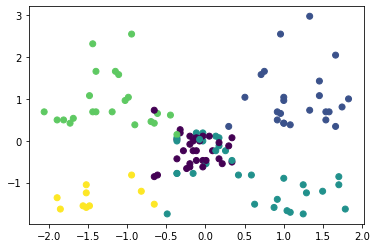

In [55]:
# Hmm... with this, it looks like 5 clusters are more evident. 
# Consisten and frequent overlap among the 4 existing clusters in the middle
plt.scatter(train_scaled.spending_score, train_scaled.annual_income, c=train_scaled.cluster)

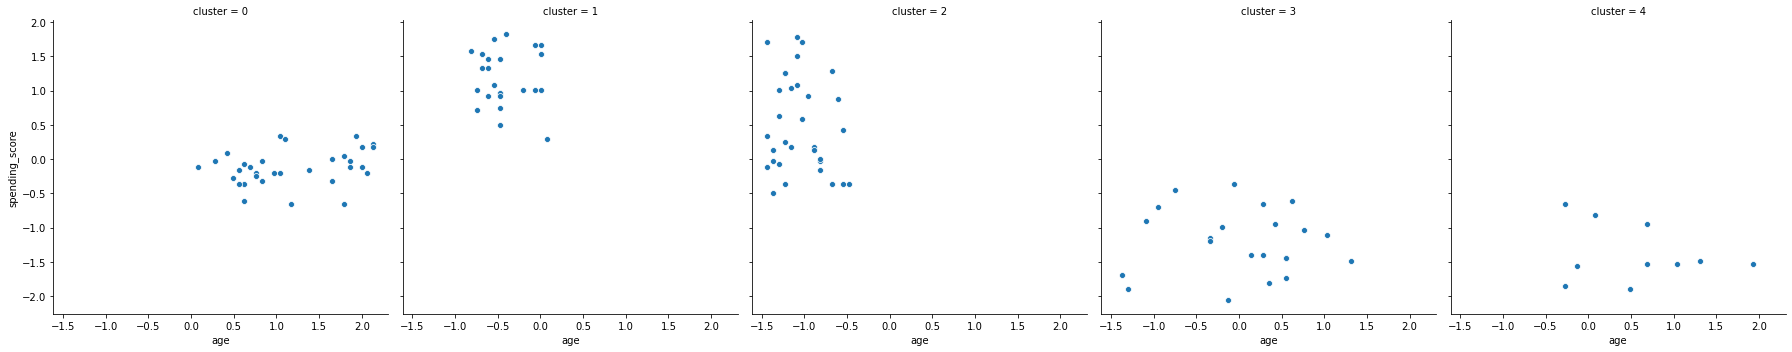

In [59]:
# One column per gender value
# One color/shape for each cluster label
sns.relplot(x="age", y="spending_score", col="cluster", data=train_scaled)

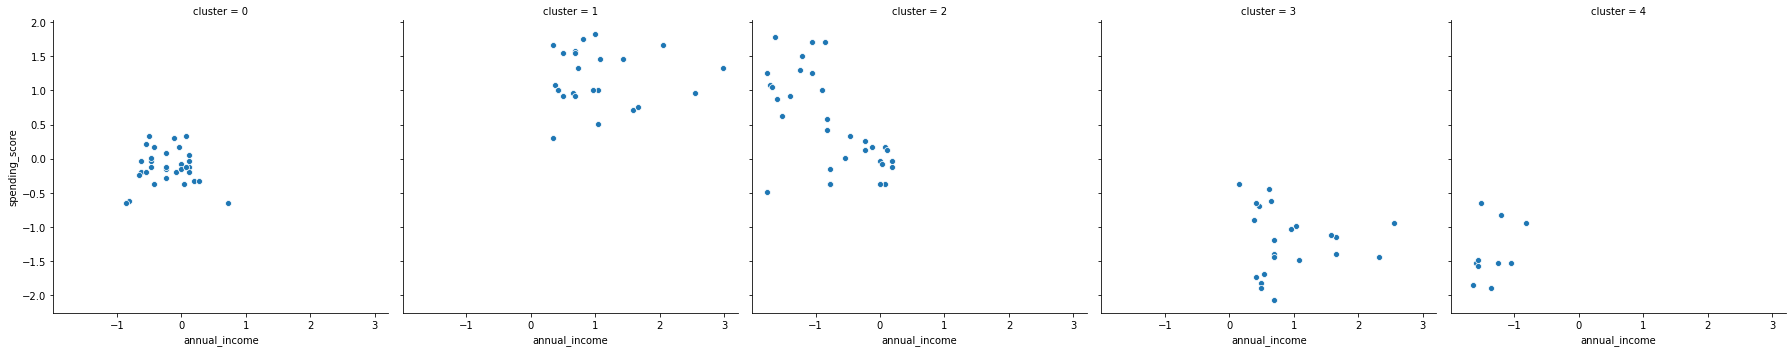

In [60]:
# One column per gender value
# One color/shape for each cluster label
sns.relplot(x="annual_income", y="spending_score", col="cluster", data=train_scaled)

## Let's compare scaled clusters vs. unscaled clusters

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


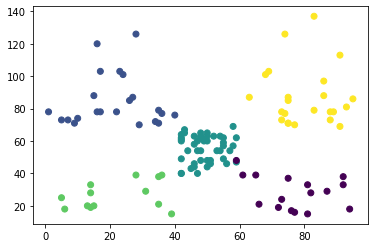

In [72]:
# Looks like the sweet spot is 4, 5, or 6
# Let's start with and visualize kmeans clusters w/ k=4

# Fit K-Means
X = train.copy()
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

train['cluster'] = kmeans.labels_
plt.scatter(train.spending_score, train.annual_income, c=train.cluster)

In [ ]:
# The unscaled clusters look more well defined with less overlap (at least w/ the income vs. spending score)
# This is pretty weird

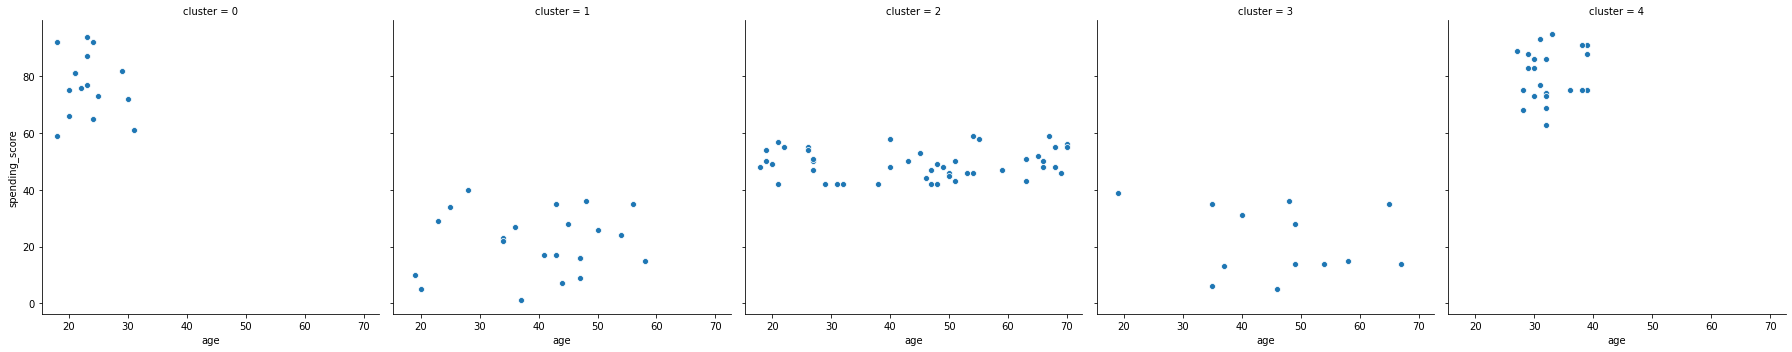

In [74]:
# One column per gender value
# One color/shape for each cluster label
sns.relplot(x="age", y="spending_score", col="cluster", data=train)